# Model Evaluation

This notebook goes over how to evaluate the results from the nowcasts that have been produced. It is assumed that the outputs from individual models have been saved in advance. 

Author: Akshay Aravamudan (aaravamudan2014@my.fit.edu)

Last Edited: Jan 21, 2025

## Imports

In [1]:
from servir.utils.evaluation import evaluation
from servir.core.data_provider import IMERGDataModule
import numpy as np
from servir.utils.evaluation import csi_boxplot, rapsd_boxplot


Pysteps configuration file found at: /volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/pysteps/pystepsrc



/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Initialize parameters

In [4]:
# event id for which the data was downloaded
event_id = 1

# location of the h5 file that was generated after downloading the data
h5_dataset_location = '../data/events/'+str(event_id)+'.h5'

# as of now, we do not have IR data, so we set it None
ir_h5_dataset_location = None

# this string is used to determine the kind of dataloader we need to use
# for processing individual events, we recommend the user to keep this fixed
dataset_type = 'wa'

# threshold to be used for critical success index
thr_list = [2,4,8]
get_crps = False

## Initialize data provider

In [5]:
data_provider =  IMERGDataModule(
        forecast_steps = 12,
        history_steps = 12,
        imerg_filename = h5_dataset_location,
        ir_filename = ir_h5_dataset_location,
        batch_size = 32,
        image_shape = (360, 516),
        normalize_data=False,
        dataset = dataset_type)

data_loader = data_provider.test_dataloader()


original shape (49, 360, 516)
Precipitation Dataset input shape:  (26, 12, 1, 360, 516)
Precipitation Dataset output shape:  (26, 12, 1, 360, 516)


## Generate metrics for each model

For each of the models, we generate the predictions and metrics -- Critical Success Index (CSI), RAPSD (Radially Averaged Power Spectral Index) and CRPS (Continuous Ranked Probability Score) and save them in a location for processing later. They are being saved because it typically takes some time to generate these metrics and it is better to load them up and process them on the fly. 


In [6]:
model_type = 'convlstm'
model_config_location = 'configs/wa_imerg/ConvLSTM.py'
model_save_location = 'temp/imerg_only_mse_params.pth'
metrics_output_location = '' 
use_gpu = False
convlstm_crps, convlstm_psd_dict, convlstm_csi_dict = evaluation(data_loader, thr_list, model_type, model_config_location, model_save_location, use_gpu, use_ensemble=False, event_name = event_id)

model_type = 'steps'
model_config_location = 'configs/wa_imerg/PySTEPS.py'
model_save_location = ''
use_gpu = False
steps_crps, steps_psd_dict, steps_csi_dict = evaluation( data_loader, thr_list, model_type, model_config_location, model_save_location, use_gpu, use_ensemble=False, event_name = event_id)

model_type = 'lagrangian'
model_config_location = 'configs/wa_imerg/lagrangian_persistence.py'
model_save_location = ''
use_gpu = False
lagrangian_crps, lagrangian_psd_dict, lagrangian_csi_dict = evaluation(data_loader, thr_list, model_type, model_config_location, model_save_location, use_gpu, use_ensemble=False, event_name = event_id)

model_type = 'naive'
model_config_location = 'configs/wa_imerg/naive_persistence.py'
model_save_location = ''
use_gpu = False
naive_crps, naive_psd_dict, naive_csi_dict = evaluation(data_loader, thr_list, model_type, model_config_location, model_save_location, use_gpu, use_ensemble=False, event_name = event_id)


loading config from configs/wa_imerg/ConvLSTM.py ...


/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


starting predictions for batch 0
0


/vol_efthymios/NFS07/en279/SERVIR/TITO_test3/ML/nowcasting/servir/core/model_picker.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype=torch.float32, device= self.config['device'])


(360, 516)
1
(360, 516)
2
(360, 516)
3
(360, 516)
4
(360, 516)
5
(360, 516)
6
(360, 516)
7
(360, 516)
8
(360, 516)
9
(360, 516)
10
(360, 516)
11
(360, 516)
12
(360, 516)
13
(360, 516)
14
(360, 516)
15
(360, 516)
16
(360, 516)
17
(360, 516)
18
(360, 516)
19
(360, 516)
20
(360, 516)
21
(360, 516)
22
(360, 516)
23
(360, 516)
24
(360, 516)
25
(360, 516)
total errored out =  0
loading config from configs/wa_imerg/PySTEPS.py ...


/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


starting predictions for batch 0
Computing STEPS nowcast
-----------------------

Inputs
------
input dimensions: 360x516
km/pixel:         10
time step:        30 minutes

Methods
-------
extrapolation:          semilagrangian
bandpass filter:        gaussian
decomposition:          fft
noise generator:        nonparametric
noise adjustment:       no
velocity perturbator:   bps
conditional statistics: no
precip. mask method:    incremental
probability matching:   cdf
FFT method:             numpy
domain:                 spatial

Parameters
----------
number of time steps:     12
ensemble size:            1
parallel threads:         1
number of cascade levels: 6
order of the AR(p) model: 2
velocity perturbations, parallel:      10.88,0.23,-7.68
velocity perturbations, perpendicular: 5.76,0.31,-2.72
precip. intensity threshold: -10.0
************************************************
* Correlation coefficients for cascade levels: *
************************************************
--------

/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


starting predictions for batch 0
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
total errored out =  0
loading config from configs/wa_imerg/naive_persistence.py ...


/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


starting predictions for batch 0
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.008747100830078125  seconds
(12, 360, 516)
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.003513813018798828  seconds
(12, 360, 516)
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.0026378631591796875  seconds
(12, 360, 516)
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.0028047561645507812  seconds
(12, 360, 516)
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.0024890899658203125  seconds
(12, 360, 516)
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.0022649765014648438  seconds
(12, 360, 516)
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.002686023712158203  second

### Load saved metrics 

Load the saved metrics for CSI, RAPSD and CRPS and visualize the outputs

### CSI

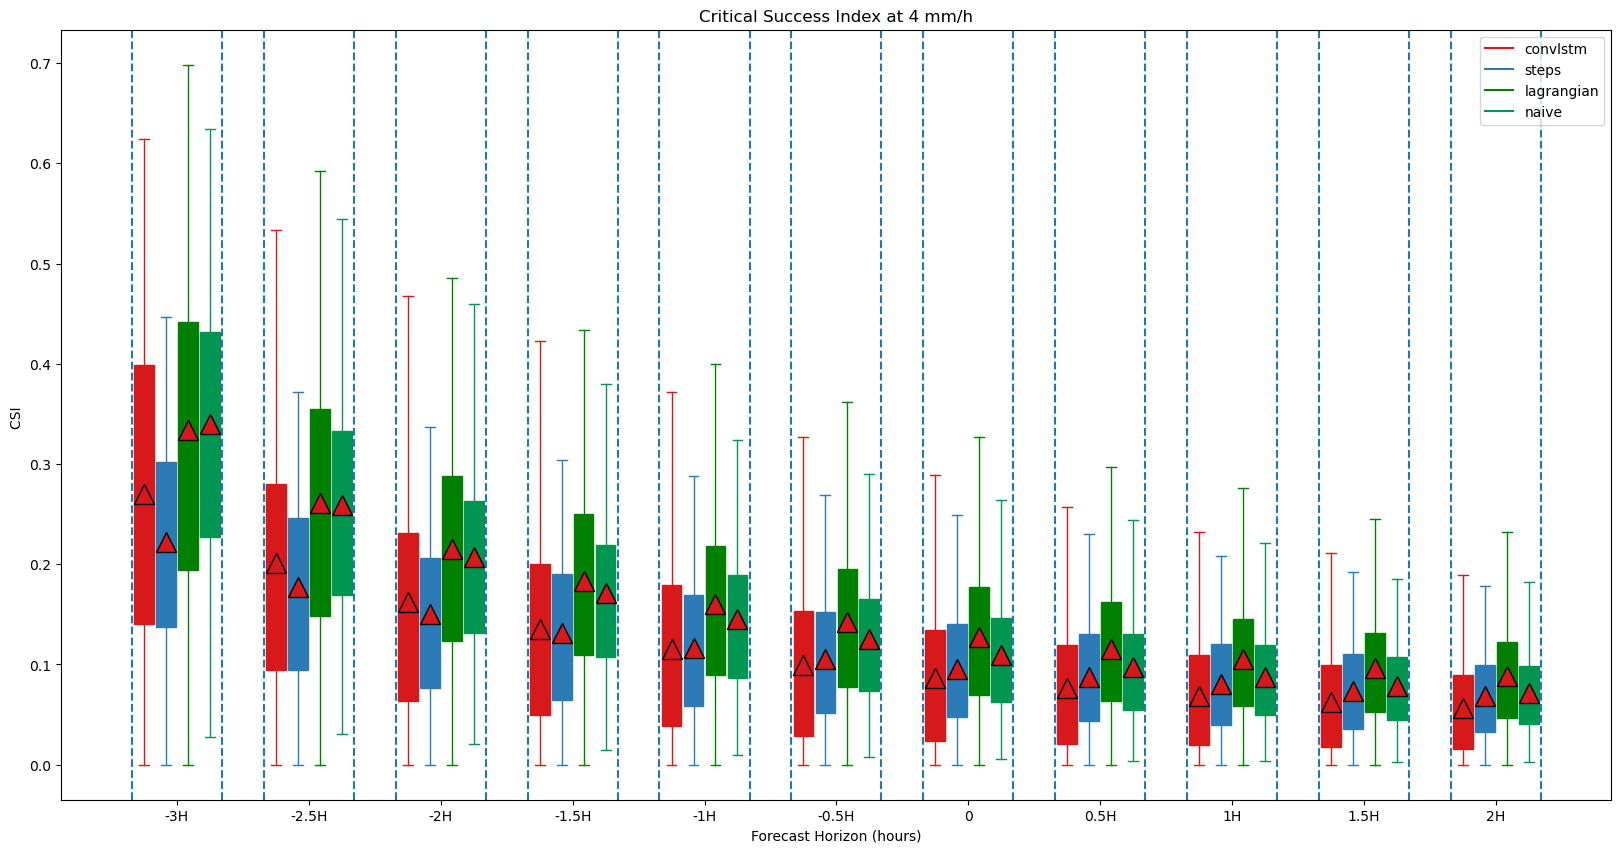

In [8]:
event_id = 1

thr = 4

convlstm_csi = np.load('results/convlstm_'+str(thr)+'_'+str(event_id)+'_csi.npy', allow_pickle=True).item()
steps_csi = np.load('results/steps_'+str(thr)+'_'+str(event_id)+'_csi.npy', allow_pickle=True).item()
lagrangian_csi = np.load('results/lagrangian_'+str(thr)+'_'+str(event_id)+'_csi.npy', allow_pickle=True).item()
naive_csi = np.load('results/naive_'+str(thr)+'_'+str(event_id)+'_csi.npy', allow_pickle=True).item()

csi_boxplot([convlstm_csi, steps_csi, lagrangian_csi, naive_csi], ['convlstm', 'steps', 'lagrangian', 'naive'], thr=thr)


## RAPSD

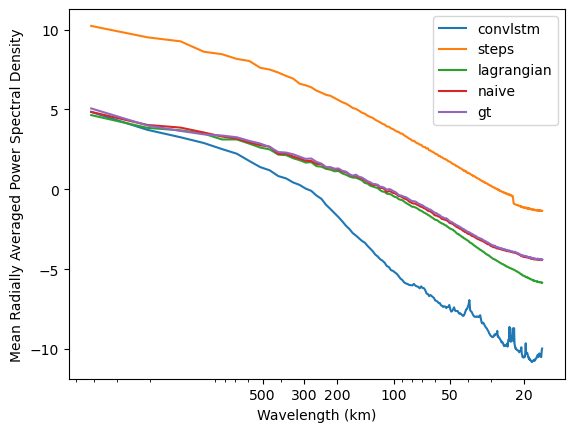

In [12]:
import numpy as np
from servir.utils.evaluation import rapsd_boxplot

event_id = 1

resolution = 11
convlstm_rapsd = np.load('results/convlstm_'+str(event_id)+'_rapsd.npy', allow_pickle=True).item()
steps_rapsd  = np.load('results/steps_'+str(event_id)+'_rapsd.npy', allow_pickle=True).item()
lagrangian_rapsd  = np.load('results/lagrangian_'+str(event_id)+'_rapsd.npy', allow_pickle=True).item()
naive_rapsd  = np.load('results/naive_'+str(event_id)+'_rapsd.npy', allow_pickle=True).item()
gt_rapsd  = np.load('results/gt_'+str(event_id)+'_rapsd.npy', allow_pickle=True).item()

rapsd_boxplot([convlstm_rapsd, steps_rapsd, lagrangian_rapsd, naive_rapsd, gt_rapsd], ['convlstm', 'steps', 'lagrangian', 'naive', 'gt'], s=resolution)
